# Neural Networks and Learning Machines
## Exercise 1 - Getting started with Jupyter notebooks and Pytorch
In this exercise you will design and train simple neural network to classify digits from the MNIST (http://yann.lecun.com/exdb/mnist/) dataset, like those in the image below.

![MNIST digits](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

The purpose of the exercise is to familiarise yourself with Jupyter notebooks and Pytorch. Don't worry if you do not understand the details behind this code. You will understand most of it after completing the course.

Before you start this exercise you need to have properly installed a conda environment according to the PDF that accompany the exercise. If you have done this properly, the code below should run without error.

Press the CONTROL + ENTER keys to run a selected block of code or text. Double click text to edit it.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

print("Yes!? Python works alright :-)")

Yes!? Python works alright :-)


### The MNIST dataset
In order to train a neural network we need some data to train the network with.
For example, we can use the MNIST dataset of handwritten digits to train a network.
MNIST consist of 70,000 grayscale images of size 28x28 pixels each.

Our goal here is to train a network that can recognize what digit an image represents.

The code below gets the dataset (downloads it if necessary) and displays one of the images.

**Exercise:** What do the digits on positions 2 and 9 have in common? Can you find another similar digit? 
The upper part of the 2 and 9 can both have an upper round part and a line down. Depending on how you write it there can be a horizontal part.  
1 and 7 are similar if you write the 1 with a line a the top. 


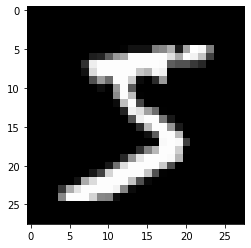

In [3]:
mnist_data = datasets.MNIST('./', train=True, download=True, transform=transforms.ToTensor())

mnist_loader = DataLoader(mnist_data, batch_size=1000, shuffle=False)

def plot_digit(data):
    # Transfrom the images into an appropriate shape for displaying
    data = data.view(28,28)
    plt.imshow(data, cmap='gray')
    plt.show()
    
images, labels = next(iter(mnist_loader))
plot_digit(images[0])

### Pytorch

In this course we will be using the deep learning framework **PyTorch**.
This exercise will be a light introduction to the framework, but to really get to know PyTorch we recommend this tutorial [https://pytorch.org/tutorials/beginner/pytorch_with_examples.html ] or finding another tutorial that suits you better.


To solve this task you will need to improve the neural network provided below.
This can be done by adding or changing the modules that are part of nn.Sequential. A list of available modules can be found here: [https://pytorch.org/docs/stable/nn.html] though it's recommended that you stick with nn.Linear, nn.Sigmoid, nn.ReLU, nn.LeakyReLU, or similar modules. Feed-Forward networks (the type recommended for this task, we'll tell you more about that later) usually consist of nn.Linear separated by activation functions (like nn.Sigmoid, and nn.Linear). Each nn.Linear layer must have the input size (first parameter) of the previous layer's output size. E.g. nn.Linear(784, 50) could be followed by nn.Linear(50, 10). 

For inspiration, see the MNIST website [http://yann.lecun.com/exdb/mnist/ ] which contains some previously tested network architectures and the corresponding classification accuracy obtained.

Additionally, you might want to change the optimizer used; (List here: [https://pytorch.org/docs/stable/optim.html ])
or loss function (List here: [https://pytorch.org/docs/stable/nn.html#loss-functions ])

Note: Not all loss functions takes the same input so you might need to restructure the data to make it work.

Any network that you design will be randomly initialized and therefore bad at recognizing images initially, which you will experience when running the code below.

In [4]:
# This code initializes the neural network

### EDIT CODE BELOW TO CHANGE THE NETWORK AND ITS OPTIMIZING PROCEDURE ###
# nn.Sequential can be given a list of neural networks modules

# This initial network has only one single linear layer.
# It has an input size equal to the size of the images (28x28 pixels = 784)
# and an output size equal to the number of classes (the number of digits = 10)
network = nn.Sequential(
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 784),
    nn.ReLU(),
    nn.Linear(784, 10)
)

# Initialize the optimizer
# In addition to changing optimizer you can try to change other parameters like learning rate (lr)
optimizer = optim.SGD(network.parameters(), lr=0.1)

# Initialize the loss function
loss_function = nn.MSELoss()

### EDIT CODE ABOVE TO CHANGE THE NETWORK AND ITS OPTIMIZING PROCEDURE ###

# An Embedding layer used for turning int into one-hot (0 -> [1,0,0,0,0,0,0,0,0,0], 5 -> [0,0,0,0,0,1,0,0,0,0])
to_onehot = nn.Embedding(10, 10) 
to_onehot.weight.data = torch.eye(10)

# Extract some images from the dataset and have the new predict what digit they are
def predict_on_images(iterator, images_to_show):
    success=0
    for index in range(images_to_show):
        # Get the next batch of images
        images, labels = next(iterator)

        #plot_digit(images[0])

        # Transform the images into a single list of pixels since our network takes that as its input
        input_tensor = images[0].view(1,784)
        # Run the input through our network to get a prediction
        prediction = network(input_tensor)
        # Extract which prediction had the highest probability
        guess = torch.argmax(prediction[0], dim=-1)
        # Show the predicted digit and the actual digit
        print('Prediction:', guess.item(), "- Actual:", labels[0].item())
        if guess.item()==labels[0].item():
            success+=1
    print("Success rate is ", success, " on ", images_to_show)

# Have the untrained network predict on some images
predict_on_images(iterator = iter(mnist_loader), images_to_show = 3)


Prediction: 3 - Actual: 5
Prediction: 3 - Actual: 0
Prediction: 5 - Actual: 5
Success rate is  1  on  3


### Training the network
Below is the training procedure. Neural networks are usually trained with backpropagation which works as follows (for now you don't need to understand the prodcedure, but you'll be expected to learn it in the course later on).
    1. Give the network the input and have it calculate a prediction.
    2. Calculate the loss/error by comparing the difference between the prediction and the target output.
    3. For the error E and each parameter w find their error gradient: (backpropagate the error)
\begin{equation*}
\frac{\partial E}{\partial w}
\end{equation*}
    4. Update the parameters according to their error gradient (since we know how this parameter affected the error we can change it to cause less error)
    5. Repeat from step 1 with new input
    
The code below **takes a while to execute**. Note the cirle at the top-right corner of the notebook, just next to the name Python followed by the version number, like **Python 3**. When the circle is filled the code is still running. An open circle means that code is not running.

In [6]:
# Decide the number of epochs to train for (one epoch is one optimization iteration on the entire dataset)
epochs = 20

# For each epoch
for epoch in range(epochs):
    
    # For each batch
    for batch_nr, (images, labels) in enumerate(mnist_loader):
        
        # Extract the labels and turn them into one-hot representation (note: not all loss functions needs this)
        labels = to_onehot(labels)
        
        # Reshape the images to a single vector (28*28 = 784)
        images = images.view(-1,784)
        
        # Predict for each digit in the batch whatclass they belong to
        prediction = network(images)
        
        # Calculate the loss of the prediction by comparing to the expected output
        loss = loss_function(prediction, labels)
        
        # Backpropagate the loss through the network to find the gradients of all parameters
        loss.backward()
        
        # Update the parameters along their gradients
        optimizer.step()
        
        # Clear stored gradient values
        optimizer.zero_grad()
        
        #Print the epoch, batch, and loss
        print(
            '\rEpoch {} [{}/{}] - Loss: {}'.format(
                epoch+1, batch_nr+1, len(mnist_loader), loss
            ),
            end=''
        )

Epoch 20 [60/60] - Loss: 0.020332394167780876

### Testing the network
To see whether our network have been trained properly we want to test it on new data, which has not been used during training. In Exercise 2 you'll need to implement a proper testing procedure, but for now we simplify things and just predict a number of digits to see whether it looks fairly alright.

**Exercise:** Can you improve the network architecture to improve the classification results?

In [7]:
# Have the trained network predict on a number of images
predict_on_images(iterator = iter(mnist_loader), images_to_show = 50)


Prediction: 5 - Actual: 5
Prediction: 0 - Actual: 0
Prediction: 5 - Actual: 5
Prediction: 9 - Actual: 9
Prediction: 7 - Actual: 7
Prediction: 7 - Actual: 7
Prediction: 6 - Actual: 6
Prediction: 8 - Actual: 8
Prediction: 0 - Actual: 0
Prediction: 6 - Actual: 6
Prediction: 3 - Actual: 3
Prediction: 6 - Actual: 6
Prediction: 7 - Actual: 7
Prediction: 7 - Actual: 7
Prediction: 1 - Actual: 1
Prediction: 5 - Actual: 5
Prediction: 8 - Actual: 8
Prediction: 3 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 8 - Actual: 8
Prediction: 5 - Actual: 5
Prediction: 7 - Actual: 7
Prediction: 3 - Actual: 3
Prediction: 7 - Actual: 7
Prediction: 8 - Actual: 8
Prediction: 7 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 5 - Actual: 5
Prediction: 1 - Actual: 1
Prediction: 2 - Actual: 2
Prediction: 3 - Actual: 3
Prediction: 5 - Actual: 6
Prediction: 8 - Actual: 8
Prediction: 3 - Actual: 3
Prediction: 4 - Actual: 4
Prediction: 1 - Actual: 1
Prediction: 4 - Actual: 9
Prediction: 4 - Actual: 4
Prediction: 